# Model: Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
import math
import statistics as st
import scipy.stats as stats
from scipy.stats import iqr
from scipy.stats import zscore
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [2]:
data = pd.read_csv('Holiday_Package.csv')

In [3]:
data.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [4]:
data = data.drop('Unnamed: 0',axis = 1)
print('The dataset has shape of ',data.shape)

The dataset has shape of  (872, 7)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


The Dataset has 872 records and no missing values.

In [6]:
data.duplicated().sum()

0

The dataset has no duplicates values.

In [7]:
data.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


In [9]:
def zero_count(_series):
    counter=0
    for val in _series:
        if val==0:
            counter+=1
    return counter 

def negative_count(_series):
    counter=0
    for val in _series:
        if val < 0:
            counter+=1
    return counter 

def percent_outlier(_series):
    counter = 0
    lb = np.percentile(_series,.25) - (1.5*iqr(_series))
    ub = np.percentile(_series,.75) + (1.5*iqr(_series))
    for val in _series:
        if val>ub or val<lb: 
            counter=counter+1
        else : pass
    return 100*counter/len(_series)

stat_list = ['TOTAL RECORDS',
 'NULL COUNT',
 'ZERO COUNT',
 'NEGATIVE COUNT',
 'MIN',
 'MAX',
 'RANGE',
 'MEAN',
 'MEDIAN',
 'MODE',
 'VARIANCE',
 'STD DEV',
 'Q1',
 'Q3',
 'IQR',
 'SKEWNESS',
 'KURTOSIS']

def stat_function(_series):
    return [round(val,2) for val in 
          [len(_series),
           _series.isna().sum(),
           zero_count(_series),
           negative_count(_series),
           min(_series),
           max(_series),
           max(_series)-min(_series),
           _series.mean(),
           np.percentile(_series,.5),
           _series.mode()[0],
           st.variance(_series),
           st.stdev(_series),
           np.percentile(_series,.25),
           np.percentile(_series,.75),
           iqr(_series),
           stats.skew(_series),
           stats.kurtosis(_series)]
          ]

def stat_df(data, feature_list):
    stat_dictionary = {}
    for x in feature_list:
        stat_dictionary[x] = stat_function(data[x])
    return pd.DataFrame(stat_dictionary, index = stat_list).T

# Finding % Outliers in our Data
def outlier_percentage_df(data, features_list):
    dict_outlier = {}
    for x in features_list:
        dict_outlier[x]=round(percent_outlier(data[x]),2)
    return pd.DataFrame(dict_outlier, index=["% OUTLIERS"]).T.sort_values("% OUTLIERS", ascending=False)

In [10]:
categorical_features=[]
numerical_features=[]
for i in data.columns:
    if data[i].dtype=="object":
        categorical_features.append(i)
    else:
        numerical_features.append(i)
print(categorical_features) 
print(numerical_features)


['Holliday_Package', 'foreign']
['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']


In [11]:
stat_df(data, numerical_features).T

,Salary,age,educ,no_young_children,no_older_children
TOTAL RECORDS,8.720000e+02,872.00,872.00,872.00,872.00
NULL COUNT,0.000000e+00,0.00,0.00,0.00,0.00
ZERO COUNT,0.000000e+00,0.00,0.00,665.00,393.00
NEGATIVE COUNT,0.000000e+00,0.00,0.00,0.00,0.00
MIN,1.322000e+03,20.00,1.00,0.00,0.00
MAX,2.369610e+05,62.00,21.00,3.00,6.00
RANGE,2.356390e+05,42.00,20.00,3.00,6.00
MEAN,4.772917e+04,39.96,9.31,0.31,0.98
MEDIAN,1.308032e+04,20.00,2.00,0.00,0.00
MODE,3.219700e+04,44.00,8.00,0.00,0.00


# Heatmap

<AxesSubplot:>

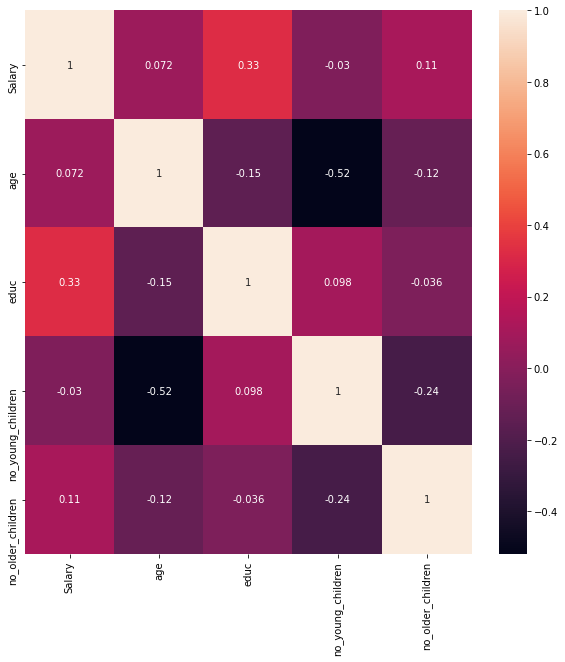

In [13]:
corr_df = data[numerical_features].corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr_df,annot = True)

# High Correlation:
    1.no_of_young_children vs education
    2.age vs salary

In [14]:
data.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

# Boxplot

In [15]:
outlier_percentage_df(data,numerical_features)

,% OUTLIERS
educ,60.55
Salary,51.83
age,34.40
no_young_children,23.74
no_older_children,2.06


The Dataset has outliers. education has high percentage of outliers.

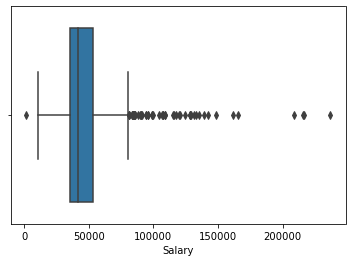

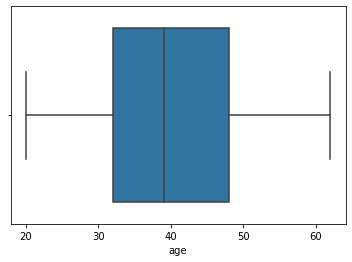

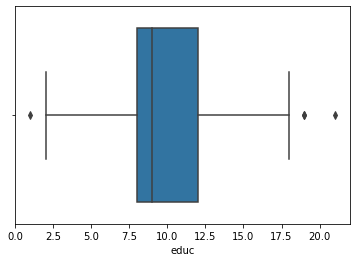

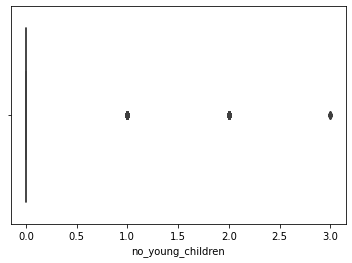

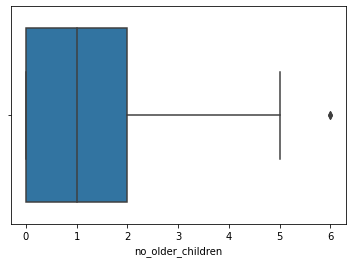

In [16]:
for i in numerical_features:
    sns.boxplot(data[i],whis = 1.5)
    plt.show()

We have outliers in the all the column in the dataset. We need to treat that for further model building.

# Outlier Treatment

In [17]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [18]:
for column in numerical_features:
    lr,ur=remove_outlier(data[column])
    data[column]=np.where(data[column]>ur,ur,data[column])
    data[column]=np.where(data[column]<lr,lr,data[column])

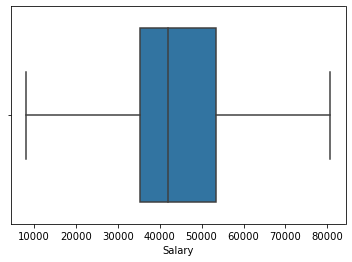

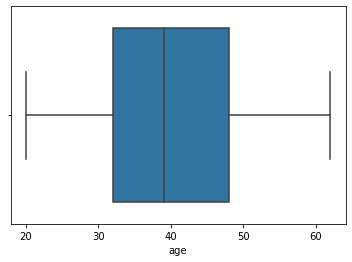

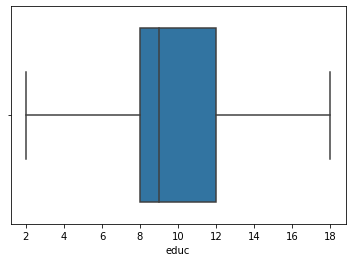

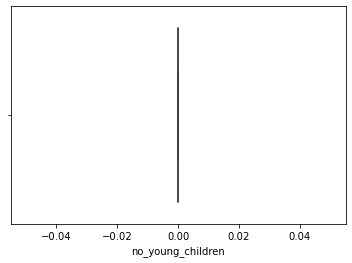

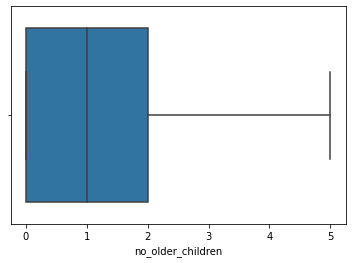

In [19]:
for i in numerical_features:
    sns.boxplot(data[i],whis = 1.5)
    plt.show()

# Histogram

array([[<AxesSubplot:title={'center':'Salary'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'educ'}>,
        <AxesSubplot:title={'center':'no_young_children'}>],
       [<AxesSubplot:title={'center':'no_older_children'}>,
        <AxesSubplot:>]], dtype=object)

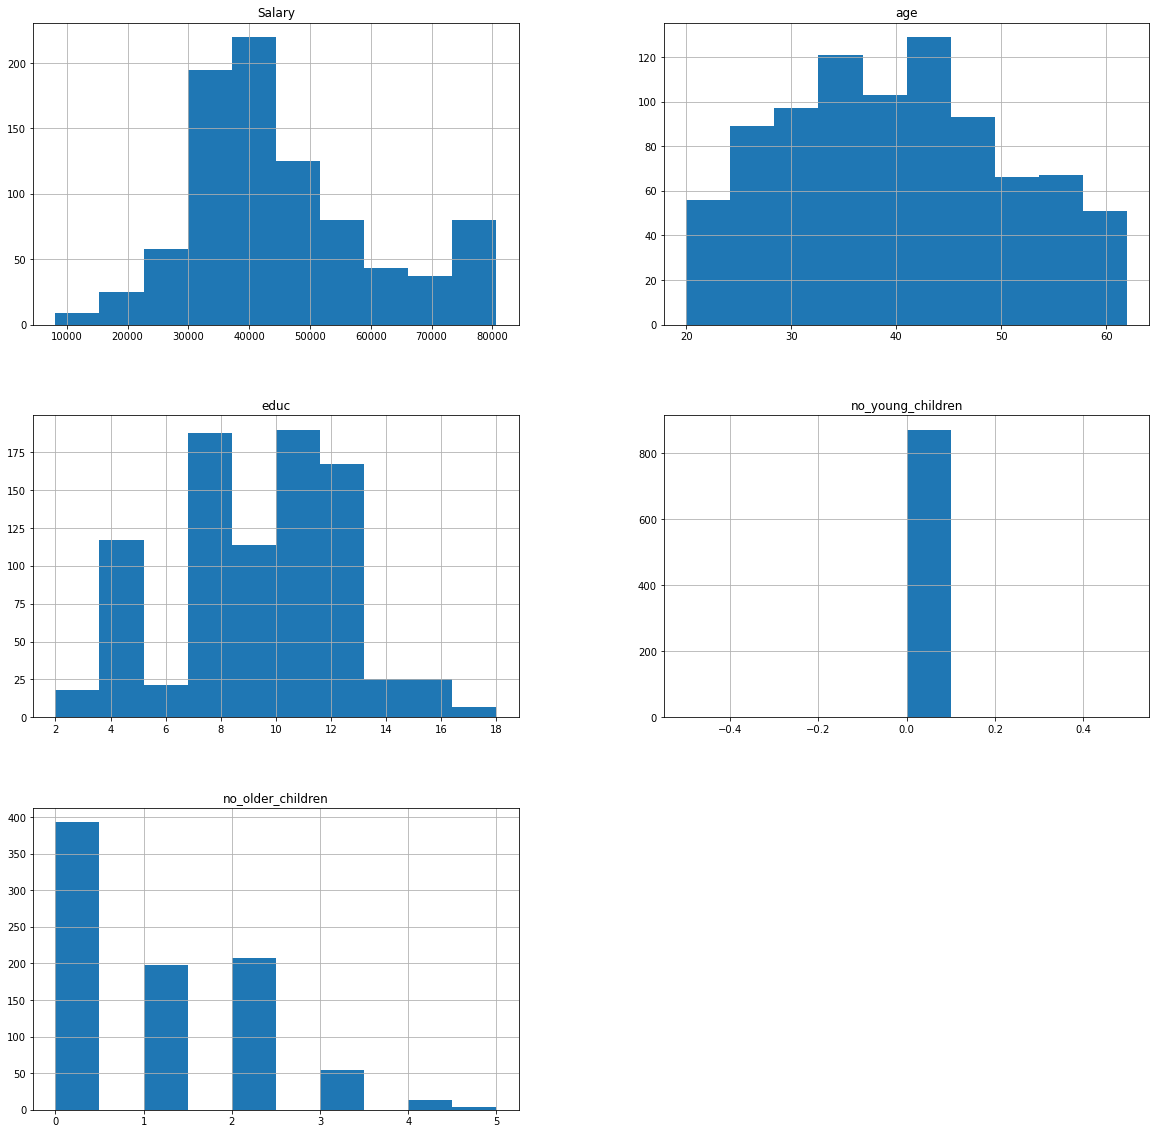

In [20]:
data.hist(figsize=(20,20))

# pairplot

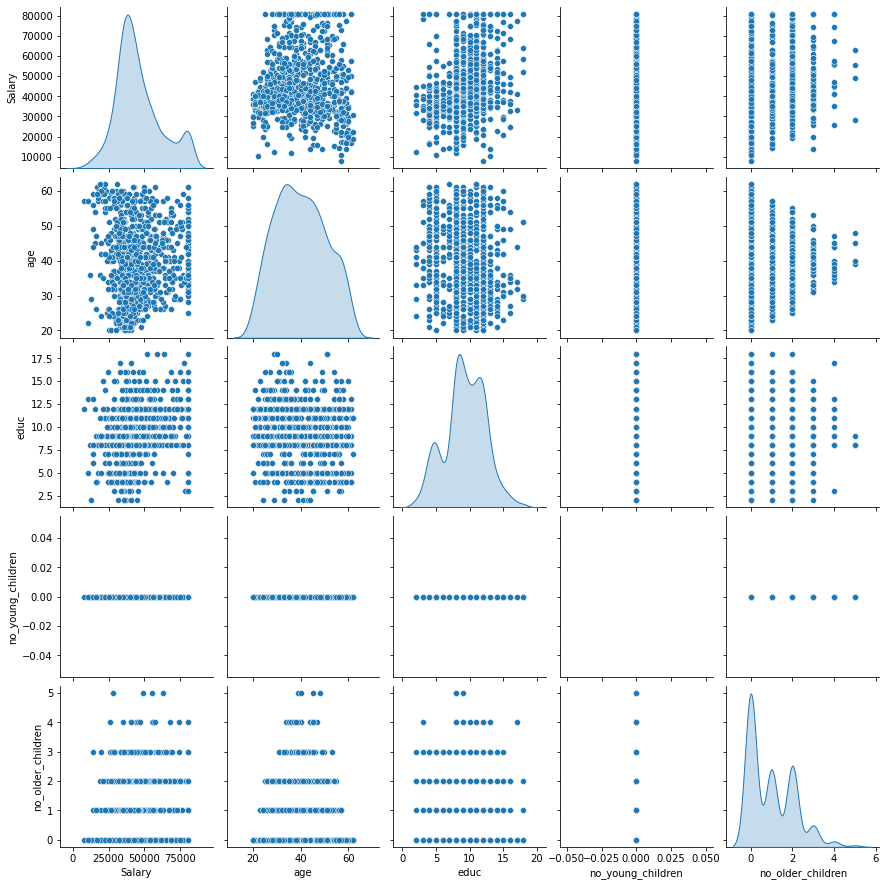

In [21]:
sns.pairplot(data,diag_kind = 'kde')

The education and the no_of_children columns are bimodel in the dataset.

# Categorical feature analysis

In [22]:
categorical_features

['Holliday_Package', 'foreign']

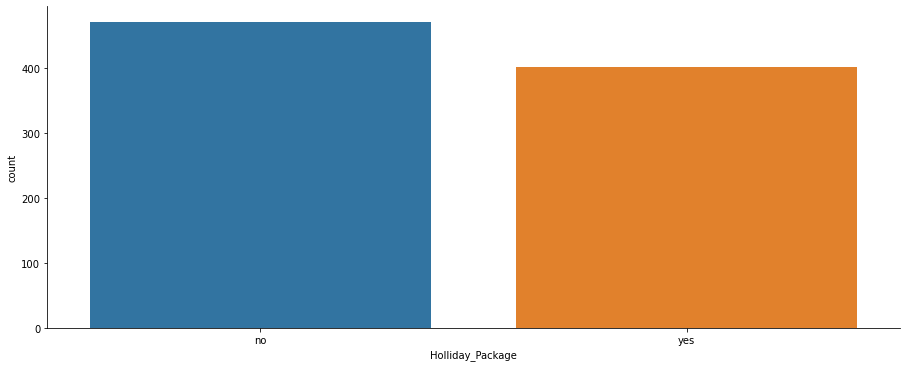

In [24]:
sns.catplot('Holliday_Package',data = data,kind = 'count',aspect = 2.5)

In [25]:
data['foreign'].value_counts()

no     656
yes    216
Name: foreign, dtype: int64

In [26]:
data['Holliday_Package'].value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

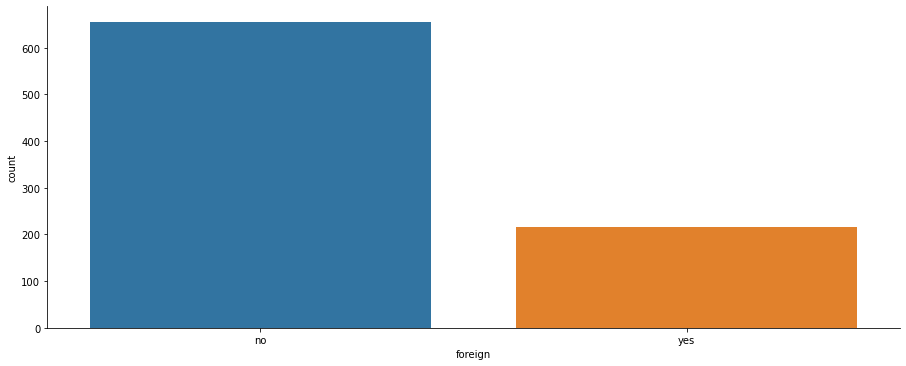

In [27]:
sns.catplot('foreign',data = data,kind = 'count',aspect = 2.5)

The categorical column of Holliday Package, foreign has No values are high.

# catogorical conversion

In [29]:
data['foreign']=np.where(data['foreign'] =='no', '0', data['foreign'])
data['foreign']=np.where(data['foreign'] =='yes', '1', data['foreign'])

In [30]:
data['Holliday_Package']=np.where(data['Holliday_Package'] =='no', '0', data['Holliday_Package'])
data['Holliday_Package']=np.where(data['Holliday_Package'] =='yes', '1', data['Holliday_Package'])

In [31]:
data.dtypes

Holliday_Package      object
Salary               float64
age                  float64
educ                 float64
no_young_children    float64
no_older_children    float64
foreign               object
dtype: object

In [32]:
data['Holliday_Package'] = data['Holliday_Package'].astype('float64')
data['foreign'] = data['foreign'].astype('float64')

In [33]:
data.dtypes

Holliday_Package     float64
Salary               float64
age                  float64
educ                 float64
no_young_children    float64
no_older_children    float64
foreign              float64
dtype: object

In [34]:
data.groupby(['Holliday_Package']).count()

,Salary,age,educ,no_young_children,no_older_children,foreign
Holliday_Package,,,,,,
0.0,471,471,471,471,471,471
1.0,401,401,401,401,401,401


In [35]:
data.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0.0,48412.0,30.0,8.0,0.0,1.0,0.0
1,1.0,37207.0,45.0,8.0,0.0,1.0,0.0
2,0.0,58022.0,46.0,9.0,0.0,0.0,0.0
3,0.0,66503.0,31.0,11.0,0.0,0.0,0.0
4,0.0,66734.0,44.0,12.0,0.0,2.0,0.0


# Train_test_split

In [36]:
x = data.drop('Holliday_Package',axis = 1)
y = data[['Holliday_Package']]

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 0)

In [38]:
x_train.shape,y_train.shape

((610, 6), (610, 1))

# Model

In [39]:
model = LogisticRegression(class_weight='balanced',penalty='l2',solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [40]:
y_predict = model.predict(x_test)

In [41]:
score = model.score(x_train,y_train)
print('The model score is',score)

The model score is 0.6557377049180327


In [42]:
score = model.score(x_test,y_test)
print('The model score is',score)

The model score is 0.6030534351145038


In [43]:
print(confusion_matrix(y_test,y_predict))

[[101  26]
 [ 78  57]]


In [44]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.56      0.80      0.66       127
         1.0       0.69      0.42      0.52       135

    accuracy                           0.60       262
   macro avg       0.63      0.61      0.59       262
weighted avg       0.63      0.60      0.59       262



# Insights:
      The linear model builded failed to predict.As we can see that from recall and precision values for 1 is zero.  
      So we build the data with LDA model for further analysis.
    

# apply LDA model

In [46]:
df = data.copy()
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0.0,48412.0,30.0,8.0,0.0,1.0,0.0
1,1.0,37207.0,45.0,8.0,0.0,1.0,0.0
2,0.0,58022.0,46.0,9.0,0.0,0.0,0.0
3,0.0,66503.0,31.0,11.0,0.0,0.0,0.0
4,0.0,66734.0,44.0,12.0,0.0,2.0,0.0


In [47]:
X = df.drop('Holliday_Package',axis = 1)
X = scale(X)
Y = df[['Holliday_Package']]

In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30,random_state = 0)

In [49]:
X_train.shape,Y_train.shape

((610, 6), (610, 1))

In [50]:
clf = LinearDiscriminantAnalysis()
model = clf.fit(X,Y)
model

LinearDiscriminantAnalysis()

In [51]:
model.score(X_train,Y_train)

0.6442622950819672

In [52]:
model.score(X_test,Y_test)

0.6106870229007634

In [53]:
pred_class = model.predict(X)
df['Prediction'] = pred_class

In [54]:
data_df= df[['Salary','age','educ','no_young_children','no_older_children','foreign']]
Cor1 = data_df.corr()
Cor1

,Salary,age,educ,no_young_children,no_older_children,foreign
Salary,1.000000,0.047029,0.352913,NaN,0.124030,-0.239387
age,0.047029,1.000000,-0.149682,NaN,-0.117754,-0.107148
educ,0.352913,-0.149682,1.000000,NaN,-0.035656,-0.420922
no_young_children,NaN,NaN,NaN,NaN,NaN,NaN
no_older_children,0.124030,-0.117754,-0.035656,NaN,1.000000,0.022729
foreign,-0.239387,-0.107148,-0.420922,NaN,0.022729,1.000000


In [55]:
confusion_matrix(Y, pred_class)

array([[387,  84],
       [235, 166]], dtype=int64)

In [56]:
print(classification_report(Y, pred_class))

              precision    recall  f1-score   support

         0.0       0.62      0.82      0.71       471
         1.0       0.66      0.41      0.51       401

    accuracy                           0.63       872
   macro avg       0.64      0.62      0.61       872
weighted avg       0.64      0.63      0.62       872



In [57]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [58]:
pred_prob_train[:,1]

array([0.20329762, 0.32622425, 0.44271371, 0.25860216, 0.41702442,
       0.6286772 , 0.71696902, 0.39172164, 0.41364777, 0.67681121,
       0.70732313, 0.21621391, 0.35741469, 0.38766696, 0.38357895,
       0.30469478, 0.42405297, 0.41250144, 0.36816394, 0.46429082,
       0.68936563, 0.46200972, 0.390897  , 0.32823659, 0.47026775,
       0.28523355, 0.15449402, 0.69620425, 0.72482733, 0.43235544,
       0.44037087, 0.28730614, 0.26360468, 0.40846097, 0.283183  ,
       0.33185799, 0.37683413, 0.37715789, 0.46932759, 0.48184883,
       0.33681479, 0.45763218, 0.37998902, 0.34723896, 0.39162135,
       0.4455298 , 0.38961274, 0.47203429, 0.36173119, 0.70679286,
       0.39810975, 0.5259059 , 0.50414491, 0.37005575, 0.36928952,
       0.30616009, 0.35453945, 0.45755462, 0.43462683, 0.68237435,
       0.32536849, 0.43145234, 0.41849986, 0.44588965, 0.22126526,
       0.41279169, 0.6808994 , 0.27224113, 0.39048961, 0.36429947,
       0.47501008, 0.68948242, 0.6619304 , 0.65997376, 0.57872

AUC for the Training Data: 0.675
AUC for the Test Data: 0.651


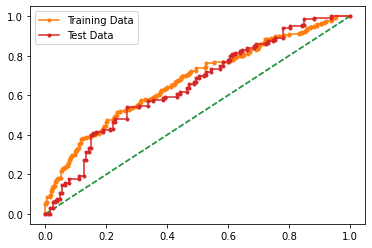

In [59]:
from sklearn import metrics
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

0.1 

Accuracy Score 0.4361
F1 Score 0.6073 

Confusion Matrix


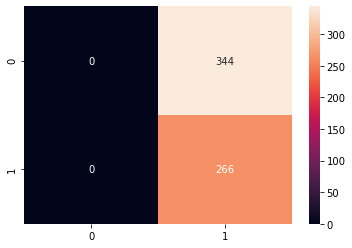

0.2 

Accuracy Score 0.4508
F1 Score 0.6136 

Confusion Matrix


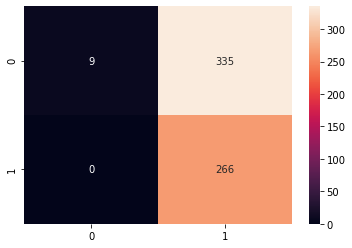

0.3 

Accuracy Score 0.4918
F1 Score 0.6096 

Confusion Matrix


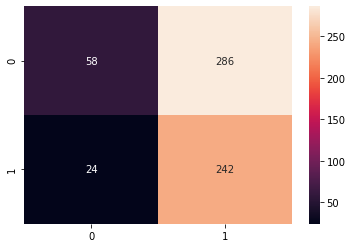

0.4 

Accuracy Score 0.6066
F1 Score 0.6117 

Confusion Matrix


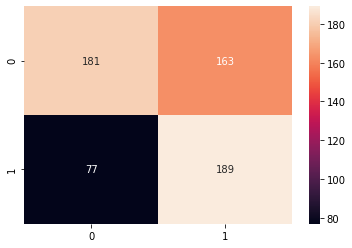

0.5 

Accuracy Score 0.6443
F1 Score 0.5124 

Confusion Matrix


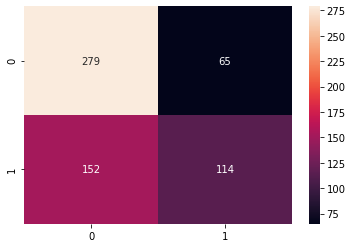

0.6 

Accuracy Score 0.6639
F1 Score 0.4963 

Confusion Matrix


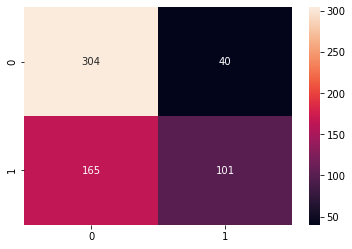

0.7 

Accuracy Score 0.6279
F1 Score 0.3343 

Confusion Matrix


In [ ]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(Y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(Y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();